# Load data and libraries

In [ ]:
import pandas as pd 

df = pd.read_csv("https://edg.epa.gov/EPADataCommons/public/OA/EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv")

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold # import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from numpy import mean
from numpy import absolute
from numpy import sqrt
import statsmodels.api as sm

In [ ]:
# Import libraries
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from nltk.classify import MaxentClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from nltk.stem import WordNetLemmatizer
from keras.layers import Dense, Flatten
from keras.models import Sequential
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from urllib import request
import scipy.linalg as la
import nltk.classify.util
from sklearn import svm
import pandas as pd
import numpy as np
import warnings
import string
import time
import nltk
import re

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import utils
from sklearn import preprocessing

# Normalizing, transforming and classification

explore the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220740 entries, 0 to 220739
Columns: 117 entries, OBJECTID to Shape_Area
dtypes: float64(73), int64(42), object(2)
memory usage: 197.0+ MB


In [ ]:
from sklearn import preprocessing

#delete missing values (?)
df_clean=df.applymap(lambda x: np.nan if x == '?' else x).dropna()
print(df_clean.shape)

#drop city name
df_cleand=df_clean.drop(["CSA_Name",'CBSA_Name'],axis=1)
df_cleand["LogNatWalkInd"] = np.log10(df_cleand['NatWalkInd'])
print(df_cleand)
# print(df.dtypes)

(167265, 117)
        OBJECTID       GEOID10       GEOID20  STATEFP  COUNTYFP  TRACTCE  \
0              1  4.811300e+11  4.811300e+11       48       113     7825   
1              2  4.811300e+11  4.811300e+11       48       113     7825   
2              3  4.811300e+11  4.811300e+11       48       113     7825   
3              4  4.811300e+11  4.811300e+11       48       113     7824   
4              5  4.811300e+11  4.811300e+11       48       113     7824   
...          ...           ...           ...      ...       ...      ...   
220646    220647  7.202100e+11  7.202100e+11       72        21    30200   
220647    220648  7.202100e+11  7.202100e+11       72        21    31401   
220648    220649  7.202100e+11  7.202100e+11       72        21    31202   
220649    220650  7.205320e+11  7.205320e+11       72        53   150400   
220650    220651  7.205320e+11  7.205320e+11       72        53   150104   

        BLKGRPCE    CSA     CBSA  CBSA_POP  ...          D5DE         D5D

In [ ]:
column_names = list(df_cleand.columns.values)
column_names

['OBJECTID',
 'GEOID10',
 'GEOID20',
 'STATEFP',
 'COUNTYFP',
 'TRACTCE',
 'BLKGRPCE',
 'CSA',
 'CBSA',
 'CBSA_POP',
 'CBSA_EMP',
 'CBSA_WRK',
 'Ac_Total',
 'Ac_Water',
 'Ac_Land',
 'Ac_Unpr',
 'TotPop',
 'CountHU',
 'HH',
 'P_WrkAge',
 'AutoOwn0',
 'Pct_AO0',
 'AutoOwn1',
 'Pct_AO1',
 'AutoOwn2p',
 'Pct_AO2p',
 'Workers',
 'R_LowWageWk',
 'R_MedWageWk',
 'R_HiWageWk',
 'R_PCTLOWWAGE',
 'TotEmp',
 'E5_Ret',
 'E5_Off',
 'E5_Ind',
 'E5_Svc',
 'E5_Ent',
 'E8_Ret',
 'E8_off',
 'E8_Ind',
 'E8_Svc',
 'E8_Ent',
 'E8_Ed',
 'E8_Hlth',
 'E8_Pub',
 'E_LowWageWk',
 'E_MedWageWk',
 'E_HiWageWk',
 'E_PctLowWage',
 'D1A',
 'D1B',
 'D1C',
 'D1C5_RET',
 'D1C5_OFF',
 'D1C5_IND',
 'D1C5_SVC',
 'D1C5_ENT',
 'D1C8_RET',
 'D1C8_OFF',
 'D1C8_IND',
 'D1C8_SVC',
 'D1C8_ENT',
 'D1C8_ED',
 'D1C8_HLTH',
 'D1C8_PUB',
 'D1D',
 'D1_FLAG',
 'D2A_JPHH',
 'D2B_E5MIX',
 'D2B_E5MIXA',
 'D2B_E8MIX',
 'D2B_E8MIXA',
 'D2A_EPHHM',
 'D2C_TRPMX1',
 'D2C_TRPMX2',
 'D2C_TRIPEQ',
 'D2R_JOBPOP',
 'D2R_WRKEMP',
 'D2A_WRKEMP',
 'D2C

In [ ]:
data = df_cleand[['Ac_Land','CountHU','P_WrkAge','Pct_AO0','Pct_AO1','Pct_AO2p','Workers','R_MedWageWk']]
data

,Ac_Land,CountHU,P_WrkAge,Pct_AO0,Pct_AO1,Pct_AO2p,Workers,R_MedWageWk
0,73.595028,460.0,0.549,0.163121,0.092199,0.744681,412,122
1,119.829909,409.0,0.466,0.000000,0.410758,0.589242,395,107
2,26.367053,365.0,0.811,0.057751,0.434650,0.507599,463,189
3,119.060687,384.0,0.638,0.000000,0.111979,0.888021,431,69
4,169.927211,343.0,0.506,0.014577,0.195335,0.790087,579,84
...,...,...,...,...,...,...,...,...
220646,34.442281,415.0,0.548,0.117470,0.475904,0.406627,0,0
220647,27.042871,324.0,0.524,0.151203,0.309278,0.539519,0,0
220648,49.273470,363.0,0.653,0.126280,0.447099,0.426621,0,0
220649,111.259740,974.0,0.586,0.000000,0.744565,0.255435,0,0


clean the dataset for modeling

In [ ]:
df["LogNatWalkInd"] = np.log10(df['NatWalkInd'])

In [ ]:
#separate x and y
y=df_cleand['LogNatWalkInd']
X=df_cleand.drop('LogNatWalkInd',axis=1)
lab = preprocessing.LabelEncoder()
yt = lab.fit_transform(y)
#train test
X_train, X_test, yt_train, yt_test = train_test_split(data, yt, test_size=0.2, random_state=1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, yt_train)


# Make predictions using the testing set
y_pred = regr.predict(X_test)

cv = KFold(n_splits=10, random_state=1, shuffle=True)

#use k-fold CV to evaluate model
scores = cross_val_score(regr, data, yt, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("Score: %.4f:" % mean(scores))

Score: -18.6147:


In [ ]:
model = LinearRegression()
model.fit(X_train, yt_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(yt_test, y_pred)
r_square = r2_score(yt_test, y_pred)

In [ ]:
print("Mean Squared Error: {:.2f}".format(mse))
print("R2: {:.2f}".format(r_square))

Mean Squared Error: 496.38
R2: 0.25


In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [ ]:
scaler.mean_

array([3.51449638e+03, 6.30799203e+02, 6.02824709e-01, 1.00668361e-01,
       3.32169806e-01, 5.62715295e-01, 6.74423295e+02, 2.15852666e+02])

In [ ]:
scaler.scale_

array([3.55035786e+04, 3.96239407e+02, 9.95114323e-02, 1.47498012e-01,
       1.54225023e-01, 2.26603820e-01, 4.37262163e+02, 1.39631964e+02])

In [ ]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[-0.0860012 , -0.81213326, -0.29971139, ...,  0.287358  ,
        -0.46522044, -0.89415534],
       [-0.08930719,  1.13366008,  0.71524737, ...,  1.16930209,
         2.16020681,  1.0538227 ],
       [-0.07066634,  0.97718902,  0.25298893, ..., -0.01322275,
         0.90466713,  2.02065005],
       ...,
       [-0.09383547, -0.50171487,  0.95642569, ...,  0.21357017,
         0.40382343,  1.65540416],
       [-0.09732402,  1.522314  ,  1.09711305, ..., -1.15777211,
         1.15851941,  2.47183614],
       [-0.09014911, -0.01211188, -0.69162615, ..., -0.04404568,
        -0.37145518,  0.10848042]])

In [ ]:
X_scaled.shape

(133812, 8)

In [ ]:
# PCR
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [ ]:
print(pca.explained_variance_ratio_)

[0.34085376 0.24809609]


In [ ]:
print(pca.singular_values_)

[604.05511614 515.35024596]


only transit access columns with log of walkability

In [ ]:
df_trans = df[["D4A", "D4B025","D4B050","D4C","D4D","D4E", "LogNatWalkInd"]]

correlation heatmap with transfit columns

<Axes: >

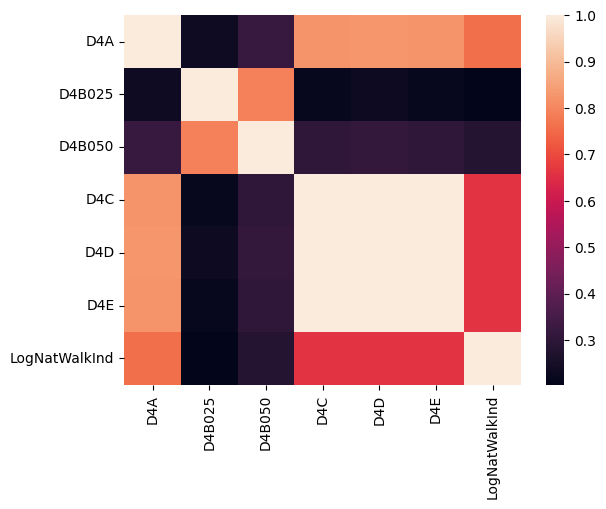

In [ ]:
sns.heatmap(df_trans.corr())

In [ ]:
#delete missing values (?)
df_trans_cleand=df_trans.applymap(lambda x: np.nan if x == '?' else x).dropna()
print(df_trans_cleand.shape)

#drop city name
df_trans_cleand=df_clean.drop(["CSA_Name",'CBSA_Name'],axis=1)
df_trans_cleand["LogNatWalkInd"] = np.log10(df_cleand['NatWalkInd'])
print(df_trans_cleand)
# print(df.dtypes)

(220739, 7)
        OBJECTID       GEOID10       GEOID20  STATEFP  COUNTYFP  TRACTCE  \
0              1  4.811300e+11  4.811300e+11       48       113     7825   
1              2  4.811300e+11  4.811300e+11       48       113     7825   
2              3  4.811300e+11  4.811300e+11       48       113     7825   
3              4  4.811300e+11  4.811300e+11       48       113     7824   
4              5  4.811300e+11  4.811300e+11       48       113     7824   
...          ...           ...           ...      ...       ...      ...   
220646    220647  7.202100e+11  7.202100e+11       72        21    30200   
220647    220648  7.202100e+11  7.202100e+11       72        21    31401   
220648    220649  7.202100e+11  7.202100e+11       72        21    31202   
220649    220650  7.205320e+11  7.205320e+11       72        53   150400   
220650    220651  7.205320e+11  7.205320e+11       72        53   150104   

        BLKGRPCE    CSA     CBSA  CBSA_POP  ...          D5DE         D5DEI

In [ ]:
#separate x and y
y=df_trans_cleand['LogNatWalkInd']
X=df_trans_cleand.drop('LogNatWalkInd',axis=1)
lab = preprocessing.LabelEncoder()
yt = lab.fit_transform(y)
#train test
X_train, X_test, yt_train, yt_test = train_test_split(df_trans_cleand, yt, test_size=0.2, random_state=1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, yt_train)


# Make predictions using the testing set
y_pred = regr.predict(X_test)

cv = KFold(n_splits=10, random_state=1, shuffle=True)

#use k-fold CV to evaluate model
scores = cross_val_score(regr, data, yt, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("Score: %.4f:" % mean(scores))

Score: -18.6147:


In [ ]:
model = LinearRegression()
model.fit(X_train, yt_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(yt_test, y_pred)
r_square = r2_score(yt_test, y_pred)

In [ ]:
print("Mean Squared Error: {:.2f}".format(mse))
print("R2: {:.2f}".format(r_square))

Mean Squared Error: 0.00
R2: 1.00


In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [ ]:
scaler.mean_

array([ 1.12110693e+05,  2.87452740e+11,  2.87452738e+11,  2.86631543e+01,
        8.19009207e+01,  2.20912051e+05,  2.21292560e+00,  3.41606560e+02,
        3.05447228e+04,  4.59529976e+06,  2.14973572e+06,  2.08678106e+06,
        3.64465074e+03,  1.30154357e+02,  3.51449638e+03,  2.74627844e+03,
        1.53039718e+03,  6.30799203e+02,  5.63380205e+02,  6.02824709e-01,
        5.30785953e+01,  1.00668361e-01,  1.87423564e+02,  3.32169806e-01,
        3.22878045e+02,  5.62715295e-01,  6.74423295e+02,  1.51170052e+02,
        2.15852666e+02,  3.07400577e+02,  2.29307723e-01,  6.82485861e+02,
        7.49952321e+01,  9.54604893e+01,  1.58460586e+02,  2.76850185e+02,
        7.67193675e+01,  7.49952321e+01,  6.98466505e+01,  1.58460586e+02,
        1.16181060e+02,  7.67193675e+01,  6.02214151e+01,  1.00447710e+02,
        2.56138388e+01,  1.52752257e+02,  2.19353302e+02,  3.10380302e+02,
        2.91403452e-01,  5.46635923e+00,  1.26297146e+01,  4.54075130e+00,
        4.27215294e-01,  

In [ ]:
scaler.scale_

array([6.32942530e+04, 1.62856270e+11, 1.62856270e+11, 1.62651416e+01,
       9.39158198e+01, 3.04518284e+05, 1.18378591e+00, 1.25777195e+02,
       1.06075809e+04, 5.58806012e+06, 2.65683736e+06, 2.57221129e+06,
       3.62962500e+04, 2.98075294e+03, 3.55035786e+04, 1.66123604e+04,
       1.02823993e+03, 3.96239407e+02, 3.53431445e+02, 9.95114323e-02,
       9.27755291e+01, 1.47498012e-01, 1.54572562e+02, 1.54225023e-01,
       2.60045201e+02, 2.26603820e-01, 4.37262163e+02, 9.33771319e+01,
       1.39631964e+02, 2.47852659e+02, 6.00934171e-02, 2.21746242e+03,
       2.30315680e+02, 7.68770462e+02, 6.99787305e+02, 1.09429478e+03,
       3.31516897e+02, 2.30315680e+02, 5.49489186e+02, 6.99787305e+02,
       6.13535377e+02, 3.31516897e+02, 4.88118960e+02, 5.19343410e+02,
       4.42033018e+02, 3.82848265e+02, 5.80626302e+02, 1.42913849e+03,
       1.56217431e-01, 1.54067775e+01, 3.27401287e+01, 5.68055700e+01,
       2.79498070e+00, 3.02575253e+01, 4.35883453e+00, 4.08289230e+01,
      

In [ ]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.05606049, -0.22853121, -0.2285312 , ..., -0.23937626,
        -0.08770892, -1.149901  ],
       [-0.77896003, -1.0275425 , -1.0275425 , ..., -0.29972475,
        -0.08954374, -0.11810191],
       [-0.76888013, -1.02632057, -1.02632056, ..., -0.11720479,
        -0.07248497,  0.44613954],
       ...,
       [-0.71551035, -1.02294336, -1.02294335, ..., -0.31775634,
        -0.09529847,  0.76598356],
       [-1.66335312,  1.18925271,  1.18925272, ..., -0.46361424,
        -0.09878447,  0.23275656],
       [ 0.90684863,  0.51664121,  0.51664122, ..., -0.33572606,
        -0.09176623,  0.55854975]])

In [ ]:
X_scaled.shape

(133812, 116)

In [ ]:
# PCR
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [ ]:
print(pca.explained_variance_ratio_)

[0.15328093 0.09805737]


In [ ]:
print(pca.singular_values_)

[1542.48373618 1233.72011836]


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import norm


 mu = 0.92 and sigma =  0.24



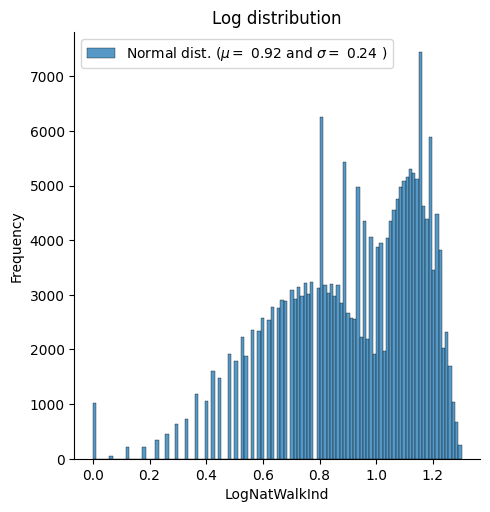

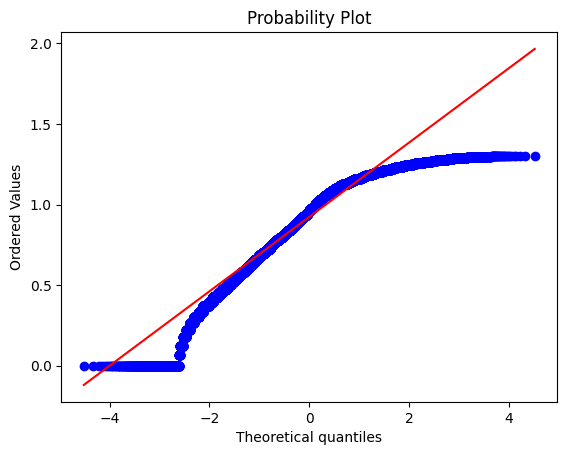

In [ ]:
# correlation
sns.displot(df["LogNatWalkInd"]);

(mu, sigma) = norm.fit(df["LogNatWalkInd"])
print('\n mu = {:.2f} and sigma =  {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Log distribution')
#the QQ-plot
fig = plt.figure()
res = stats.probplot(df["LogNatWalkInd"], plot=plt)
plt.show()

Correlation for all columns and select top three for modeling

In [ ]:
corr_mx = df.corr()
corr_mx["LogNatWalkInd"].sort_values(ascending=False)

<ipython-input-49-c403567cc15c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mx = df.corr()


LogNatWalkInd    1.000000
NatWalkInd       0.957524
D3B_Ranked       0.778581
D4A_Ranked       0.760904
D5DRI            0.758154
                   ...   
AutoOwn2p       -0.158249
Ac_Unpr         -0.203934
TRACTCE         -0.265274
Pct_AO2p        -0.325525
Shape_Length    -0.415615
Name: LogNatWalkInd, Length: 116, dtype: float64

Modeling with highest correlated columns - Linear regression and PCA

In [ ]:
df_corr = df[['LogNatWalkInd','D3B_Ranked','D4A_Ranked','D5DRI']]

In [ ]:
#separate x and y
y=df_corr['LogNatWalkInd']
X=df_corr.drop('LogNatWalkInd',axis=1)
lab = preprocessing.LabelEncoder()
yt = lab.fit_transform(y)
#train test
X_train, X_test, yt_train, yt_test = train_test_split(df_corr, yt, test_size=0.2, random_state=1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, yt_train)


# Make predictions using the testing set
y_pred = regr.predict(X_test)

cv = KFold(n_splits=10, random_state=1, shuffle=True)

#use k-fold CV to evaluate model
scores = cross_val_score(regr, df_corr, yt, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("Score: %.4f:" % mean(scores))

Score: -3.9962:


In [ ]:
model = LinearRegression()
model.fit(X_train, yt_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(yt_test, y_pred)
r_square = r2_score(yt_test, y_pred)

In [ ]:
print("Mean Squared Error: {:.2f}".format(mse))
print("R2: {:.2f}".format(r_square))

# Determines that not a big proportion of variance in the dependent variable can be explained by the independent variable

Mean Squared Error: 29.96
R2: 0.96


In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [ ]:
scaler.mean_

array([ 9.23301342e-01,  1.04994111e+01,  7.61381037e+00, -5.73909286e+04])

In [ ]:
scaler.scale_

array([2.37439095e-01, 5.76868777e+00, 7.81039492e+00, 4.94502578e+04])

In [ ]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[-0.94479528, -0.95332098, -0.8467959 , -0.86163497],
       [-0.82674933,  0.43347621, -0.8467959 , -0.86163497],
       [-1.2065378 , -1.47336993, -0.8467959 , -0.86163497],
       ...,
       [-2.62076195, -1.64671958, -0.8467959 , -0.86163497],
       [ 0.02576486, -0.95332098,  0.68961809,  1.16057896],
       [-0.46491074, -0.95332098, -0.8467959 , -0.86163497]])

In [ ]:
X_scaled.shape

(176592, 4)

In [ ]:
# PCR
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [ ]:
print(pca.explained_variance_ratio_)

[0.80293886 0.15028663]


In [ ]:
print(pca.singular_values_)

[753.10710834 325.81845742]


Naive Bayes model with highest correlated columns

In [ ]:
model = GaussianNB()
model.fit(X_scaled, yt_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(yt_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 1.5040318927244722


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


# reference

https://github.com/sajal2692/Scalable-Walkability-Analysis-of-Melbourne

https://www.epa.gov/sites/default/files/2021-06/documents/epa_sld_3.0_technicaldocumentationuserguide_may2021.pdf
